# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# Load Dataset

In [2]:
#datasets = pd.read_csv('../input/boston-housing/housing.data', delim_whitespace=True, header= None)

In [3]:
boston_data = load_boston()
datasets = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [4]:
#columns_datasets =  ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
#datasets.columns = columns_datasets

In [6]:
datasets.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Decision Tree

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
X = datasets[['LSTAT']].values
y = boston_data.target

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
tree_model = DecisionTreeRegressor(max_depth=5)

In [11]:
tree_model.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [12]:
y_test_Predict = tree_model.predict(x_test)
y_train_Predict = tree_model.predict(x_train)

In [13]:
print('Mean Squared Error\t Train : {0:0.4f}, Test: {1:.4f}'.format(mean_squared_error(y_train, y_train_Predict), mean_squared_error(y_test, y_test_Predict)))

Mean Squared Error	 Train : 21.5316, Test: 19.9366


In [14]:
print('R Score\t Train : {0:0.4f}, Test: {1:.4f}'.format(r2_score(y_train, y_train_Predict), r2_score(y_test, y_test_Predict)))

R Score	 Train : 0.7550, Test: 0.7324


In [15]:
idx = X.flatten().argsort()

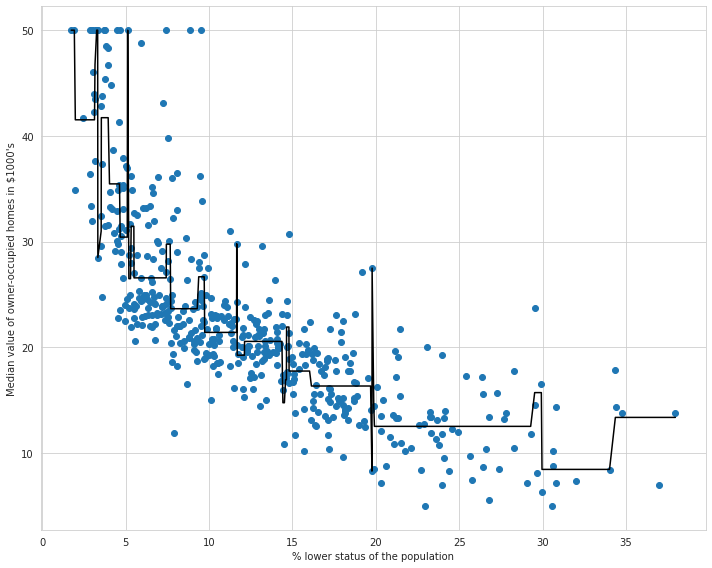

In [16]:
plt.figure(figsize = (10, 8))
plt.scatter(X[idx], y[idx])
plt.plot(X[idx], tree_model.predict(X[idx]), color = 'k')
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.tight_layout()
plt.show()

Using Max Depth = 5 is lead to overfitting,
Now, Let's try max depth = 2

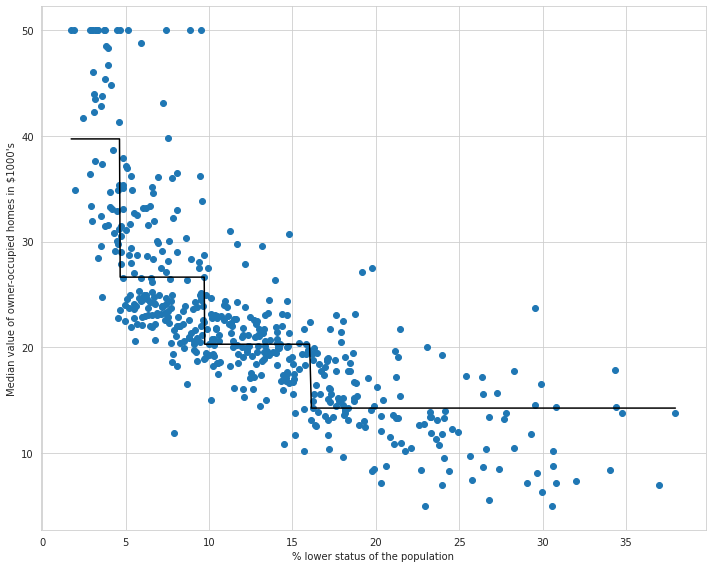

In [17]:
tree_model = DecisionTreeRegressor(max_depth=2)
tree_model.fit(X, y)
plt.figure(figsize = (10, 8))
plt.scatter(X[idx], y[idx])
plt.plot(X[idx], tree_model.predict(X[idx]), color = 'k')
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.tight_layout()
plt.show()

# Random Forest

In [18]:
X = datasets.values

In [19]:
forest_model = RandomForestRegressor(n_estimators=500,
                                    criterion='mse',
                                    random_state = 42,
                                    n_jobs= -1)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
forest_model.fit(X, y)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [22]:
y_train_Predict = forest_model.predict(x_train)

In [23]:
y_test_Predict = forest_model.predict(x_test)

In [24]:
print('Mean Squared Error\t Train : {0:0.4f}, Test: {1:.4f}'.format(mean_squared_error(y_train, y_train_Predict), mean_squared_error(y_test, y_test_Predict)))

Mean Squared Error	 Train : 1.4623, Test: 1.1729


In [25]:
print('R Score\t Train : {0:0.4f}, Test: {1:.4f}'.format(r2_score(y_train, y_train_Predict), r2_score(y_test, y_test_Predict)))

R Score	 Train : 0.9834, Test: 0.9843


# AdaBoost

In [26]:
from sklearn.ensemble import AdaBoostRegressor

In [27]:
adaBoost_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                        n_estimators=500, random_state=42)

In [28]:
adaBoost_model.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=500, random_state=42)

In [29]:
y_train_Predict = adaBoost_model.predict(x_train)
y_test_Predict = adaBoost_model.predict(x_test)

In [30]:
print('Mean Squared Error\t Train : {0:0.4f}, Test: {1:.4f}'.format(mean_squared_error(y_train, y_train_Predict), mean_squared_error(y_test, y_test_Predict)))

Mean Squared Error	 Train : 4.4567, Test: 13.2427


In [31]:
print('R Score\t Train : {0:0.4f}, Test: {1:.4f}'.format(r2_score(y_train, y_train_Predict), r2_score(y_test, y_test_Predict)))

R Score	 Train : 0.9493, Test: 0.8223


# Feature Importance
 In this dataset there are 13 features.

Are they all equally important?

Which features are more important?

Can scikit-learn help us with this?

# According to AdaBoost

In [32]:
adaBoost_model.feature_importances_

array([0.03284169, 0.0017967 , 0.01146074, 0.00209209, 0.03897159,
       0.24219268, 0.01057968, 0.13055771, 0.01554554, 0.02348895,
       0.04072215, 0.02430303, 0.42544745])

In [33]:
result = pd.DataFrame(adaBoost_model.feature_importances_, datasets.columns)
result.columns = ['feature']

In [34]:
result.sort_values(by = 'feature', ascending=False)

,feature
LSTAT,0.425447
RM,0.242193
DIS,0.130558
PTRATIO,0.040722
NOX,0.038972
CRIM,0.032842
B,0.024303
TAX,0.023489
RAD,0.015546
INDUS,0.011461


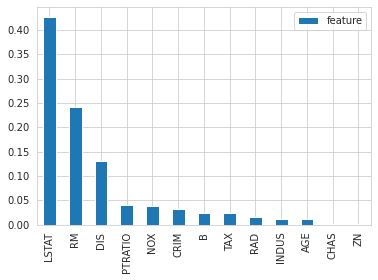

In [35]:
result.sort_values(by = 'feature', ascending=False).plot(kind = 'bar')

# According to Random Forest

In [36]:
forest_model.feature_importances_

array([0.03879629, 0.00115215, 0.00616303, 0.00085089, 0.02285895,
       0.41691958, 0.01309308, 0.06470361, 0.0042883 , 0.01398824,
       0.01655915, 0.01162375, 0.38900298])

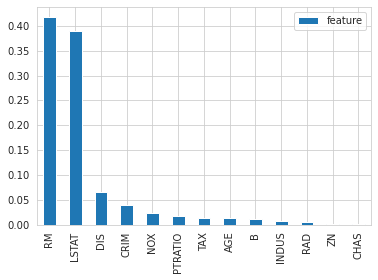

In [37]:
result = pd.DataFrame(forest_model.feature_importances_, datasets.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar');

# According to Decision Tree

In [38]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(x_train, y_train)

y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

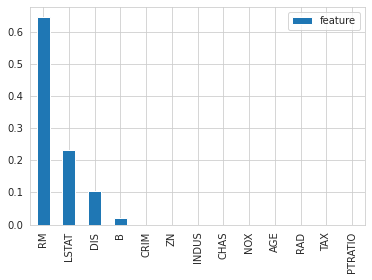

In [39]:
result = pd.DataFrame(tree.feature_importances_, datasets.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar');